In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 5

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
Total params: 1,097
Trainable params: 1,097
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
10/10 [==============================] - 2s 137ms/step - loss: 1.6112 - accuracy: 0.2544 - val_loss: 1.5972 - val_accuracy: 0.4124

Epoch 00001: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 2/1000
10/10 [==============================] - 0s 11ms/step - loss: 1.5892 - accuracy: 0.3828 - val_loss: 1.5753 - val_accuracy: 0.5361

Epoch 00002: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 3/1000
10/10 [==============================] - 0s 10ms/step - loss: 1.5605 - accuracy: 0.3984 - val_loss: 1.5529 - val_accuracy: 0.5979

Epoch 00003: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 4/1000
10/10 [==============================] - 0s 9ms/step - loss: 1.5429 - accuracy: 0.3817 - val_loss: 1.5288 - val_accuracy: 0.5954

Epoch 00004: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 5/1000
10/10 [==============================] - 0s 11ms/st

10/10 [==============================] - 0s 6ms/step - loss: 0.8052 - accuracy: 0.7965 - val_loss: 0.8255 - val_accuracy: 0.8505

Epoch 00036: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 37/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.7870 - accuracy: 0.8026 - val_loss: 0.8177 - val_accuracy: 0.8505

Epoch 00037: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 38/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.8043 - accuracy: 0.8113 - val_loss: 0.8092 - val_accuracy: 0.8531

Epoch 00038: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 39/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.7926 - accuracy: 0.7983 - val_loss: 0.8016 - val_accuracy: 0.8582

Epoch 00039: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 40/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.7

10/10 [==============================] - 0s 6ms/step - loss: 0.6378 - accuracy: 0.8513 - val_loss: 0.6717 - val_accuracy: 0.8866

Epoch 00071: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 72/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.5732 - accuracy: 0.8693 - val_loss: 0.6694 - val_accuracy: 0.8866

Epoch 00072: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 73/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.6038 - accuracy: 0.8711 - val_loss: 0.6686 - val_accuracy: 0.8866

Epoch 00073: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 74/1000
10/10 [==============================] - 0s 13ms/step - loss: 0.5804 - accuracy: 0.8486 - val_loss: 0.6685 - val_accuracy: 0.8866

Epoch 00074: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 75/1000
10/10 [==============================] - ETA: 0s - loss: 0.5335

10/10 [==============================] - 0s 8ms/step - loss: 0.4695 - accuracy: 0.8913 - val_loss: 0.6206 - val_accuracy: 0.9046

Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 107/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.5597 - accuracy: 0.8722 - val_loss: 0.6211 - val_accuracy: 0.9072

Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 108/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.5136 - accuracy: 0.8598 - val_loss: 0.6207 - val_accuracy: 0.9046

Epoch 00108: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 109/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4895 - accuracy: 0.8866 - val_loss: 0.6193 - val_accuracy: 0.9046

Epoch 00109: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 110/1000
10/10 [==============================] - 0s 6ms/step - loss:

10/10 [==============================] - 0s 5ms/step - loss: 0.4666 - accuracy: 0.8975 - val_loss: 0.5723 - val_accuracy: 0.9124

Epoch 00141: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 142/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4892 - accuracy: 0.8935 - val_loss: 0.5721 - val_accuracy: 0.9098

Epoch 00142: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 143/1000
10/10 [==============================] - ETA: 0s - loss: 0.3500 - accuracy: 0.89 - 0s 11ms/step - loss: 0.4166 - accuracy: 0.8992 - val_loss: 0.5711 - val_accuracy: 0.9098

Epoch 00143: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 144/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4929 - accuracy: 0.8827 - val_loss: 0.5694 - val_accuracy: 0.9098

Epoch 00144: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 145/1000
10/10 [==========

10/10 [==============================] - 0s 7ms/step - loss: 0.4115 - accuracy: 0.9014 - val_loss: 0.5294 - val_accuracy: 0.9149

Epoch 00176: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 177/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4252 - accuracy: 0.8947 - val_loss: 0.5289 - val_accuracy: 0.9149

Epoch 00177: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 178/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.4809 - accuracy: 0.8923 - val_loss: 0.5287 - val_accuracy: 0.9149

Epoch 00178: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 179/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.4984 - accuracy: 0.8962 - val_loss: 0.5262 - val_accuracy: 0.9149

Epoch 00179: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 180/1000
10/10 [==============================] - 0s 11ms/step - loss

10/10 [==============================] - 0s 10ms/step - loss: 0.4098 - accuracy: 0.8942 - val_loss: 0.4904 - val_accuracy: 0.9201

Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 212/1000
10/10 [==============================] - 0s 9ms/step - loss: 0.4256 - accuracy: 0.8995 - val_loss: 0.4881 - val_accuracy: 0.9201

Epoch 00212: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 213/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.4109 - accuracy: 0.8930 - val_loss: 0.4863 - val_accuracy: 0.9201

Epoch 00213: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 214/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.3829 - accuracy: 0.9030 - val_loss: 0.4856 - val_accuracy: 0.9201

Epoch 00214: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 215/1000
10/10 [==============================] - 0s 6ms/step - loss

10/10 [==============================] - 0s 7ms/step - loss: 0.3905 - accuracy: 0.8996 - val_loss: 0.4565 - val_accuracy: 0.9304

Epoch 00246: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 247/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3788 - accuracy: 0.9096 - val_loss: 0.4571 - val_accuracy: 0.9304

Epoch 00247: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 248/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.4119 - accuracy: 0.9096 - val_loss: 0.4578 - val_accuracy: 0.9304

Epoch 00248: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 249/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.4044 - accuracy: 0.9008 - val_loss: 0.4555 - val_accuracy: 0.9304

Epoch 00249: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 250/1000
10/10 [==============================] - 0s 7ms/step - loss:

10/10 [==============================] - 0s 6ms/step - loss: 0.3704 - accuracy: 0.9024 - val_loss: 0.4320 - val_accuracy: 0.9253

Epoch 00281: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 282/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.3578 - accuracy: 0.9151 - val_loss: 0.4298 - val_accuracy: 0.9253

Epoch 00282: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 283/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.3785 - accuracy: 0.9077 - val_loss: 0.4290 - val_accuracy: 0.9253

Epoch 00283: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 284/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.3842 - accuracy: 0.9024 - val_loss: 0.4279 - val_accuracy: 0.9278

Epoch 00284: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 285/1000
10/10 [==============================] - 0s 7ms/step - loss:

10/10 [==============================] - 0s 7ms/step - loss: 0.3725 - accuracy: 0.9080 - val_loss: 0.4026 - val_accuracy: 0.9278

Epoch 00316: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 317/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.3443 - accuracy: 0.9109 - val_loss: 0.4019 - val_accuracy: 0.9278

Epoch 00317: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 318/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3635 - accuracy: 0.9033 - val_loss: 0.4020 - val_accuracy: 0.9253

Epoch 00318: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 319/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.3359 - accuracy: 0.9126 - val_loss: 0.4006 - val_accuracy: 0.9253

Epoch 00319: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 320/1000
10/10 [==============================] - 0s 8ms/step - loss:

Epoch 351/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3477 - accuracy: 0.9067 - val_loss: 0.3685 - val_accuracy: 0.9253

Epoch 00351: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 352/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3166 - accuracy: 0.9186 - val_loss: 0.3682 - val_accuracy: 0.9253

Epoch 00352: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 353/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.3123 - accuracy: 0.9204 - val_loss: 0.3678 - val_accuracy: 0.9278

Epoch 00353: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 354/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.3155 - accuracy: 0.9125 - val_loss: 0.3685 - val_accuracy: 0.9304

Epoch 00354: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 355/1000
10/10 [==============================] - 0s 6

10/10 [==============================] - 0s 6ms/step - loss: 0.3410 - accuracy: 0.9102 - val_loss: 0.3426 - val_accuracy: 0.9304

Epoch 00386: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 387/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3441 - accuracy: 0.9077 - val_loss: 0.3411 - val_accuracy: 0.9278

Epoch 00387: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 388/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3473 - accuracy: 0.9112 - val_loss: 0.3396 - val_accuracy: 0.9304

Epoch 00388: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 389/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3337 - accuracy: 0.9157 - val_loss: 0.3396 - val_accuracy: 0.9304

Epoch 00389: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 390/1000
10/10 [==============================] - 0s 7ms/step - loss:

Epoch 421/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.3351 - accuracy: 0.9115 - val_loss: 0.3205 - val_accuracy: 0.9304

Epoch 00421: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 422/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.3312 - accuracy: 0.9100 - val_loss: 0.3204 - val_accuracy: 0.9304

Epoch 00422: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 423/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.2969 - accuracy: 0.9251 - val_loss: 0.3199 - val_accuracy: 0.9304

Epoch 00423: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 424/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.3185 - accuracy: 0.9175 - val_loss: 0.3195 - val_accuracy: 0.9304

Epoch 00424: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 425/1000
10/10 [==============================] - 0s 1

10/10 [==============================] - 0s 10ms/step - loss: 0.3214 - accuracy: 0.9153 - val_loss: 0.3073 - val_accuracy: 0.9330

Epoch 00456: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 457/1000
10/10 [==============================] - 0s 10ms/step - loss: 0.2787 - accuracy: 0.9332 - val_loss: 0.3069 - val_accuracy: 0.9330

Epoch 00457: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 458/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.3217 - accuracy: 0.9145 - val_loss: 0.3060 - val_accuracy: 0.9330

Epoch 00458: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 459/1000
10/10 [==============================] - 0s 7ms/step - loss: 0.3360 - accuracy: 0.9103 - val_loss: 0.3061 - val_accuracy: 0.9330

Epoch 00459: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 460/1000
10/10 [==============================] - 0s 7ms/step - los

OSError: Unable to create file (unable to open file: name = 'model/point_history_classifier\point_history_classifier.hdf5', errno = 22, error message = 'Invalid argument', flags = 13, o_flags = 302)

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.9438375  0.01624594 0.01188833 0.02802826]
0


# 混同行列

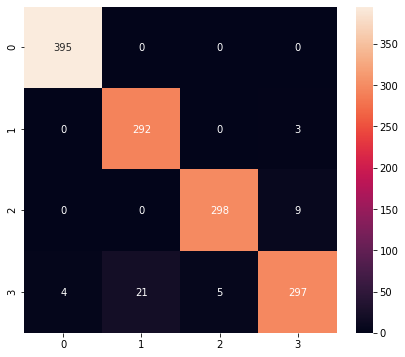

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.93      0.99      0.96       295
           2       0.98      0.97      0.98       307
           3       0.96      0.91      0.93       327

    accuracy                           0.97      1324
   macro avg       0.97      0.97      0.97      1324
weighted avg       0.97      0.97      0.97      1324



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [ ]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [16]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [ ]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

# 推論テスト

In [17]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [18]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_1', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [19]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [20]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [21]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.9579909  0.01342559 0.00907356 0.01950999]
0
